# <center> <span style='color:Blue'>---LAB-5: Image denoising in wavelet domain---</span> <center>

<span style='color:Magenta'>I-Import libraries and Preliminary</span>
=======

Image Denoising 
----------------
We consider a simple generative model of noisy images $F = f_0+W$
where $f_0 \in \mathbb{R}^N$ is a deterministic image of $N$ pixels, and
$W$ is a Gaussian white noise distributed according to $\mathbb{N}(0,\sigma^2
\text{Id}_N)$, where $\sigma^2$ is the variance of noise.


The goal of denoising is to define an estimator $\tilde F$ of
$f_0$ that depends only on $F$, i.e. $\tilde F = \phi(F)$
where $\phi : \mathbb{R}^N \rightarrow \mathbb{R}^N$ is a potentially non-linear
mapping.

The goal of denoising is to reduce as much as possible the denoising
error given some prior knowledge on the (unknown) image $f_0$.
A mathematical way to measure this error is to bound the
quadratic risk $\mathbb{E}_w(||{\tilde F - f_0}||^2)$, where the expectation is computed
with respect to the distribution of the noise $W$.

Image loading and adding Gaussian Noise
---------------------------------------
For real life applications, one does not have access to the underlying
image $f_0$. In this tour, we however assume that $f_0$ is known, and
$f = f_0 + w\in \mathbb{R}^N$ is generated using a single realization of the noise $w$
that is drawn from $W$.


First we load an image $f \in \mathbb{R}^N$ where $N=n \times n$ is the number of pixels.

The basic philosophy is based upon the local knowledge that wavelet coefficients offer us: Intuitively, small wavelet coefficients are dominated by noise, while wavelet coefficients with a large absolute value carry more signal information than noise. Being that the case, it is reasonable to obtain a fast denoising of a given image if we perform two basic operations:

- Eliminate in the wavelet representation those elements with small coefficients
- Decrease the impact of elements with large coefficients.

In mathematical terms, all we are doing is thresholding the absolute value of wavelet coefficients by an appropriate function. For example, if we chose to eliminate all coefficients with absolute value less than a given threshold $\theta$, and keep the rest of the coefficients untouched, we end up with the thresholding function

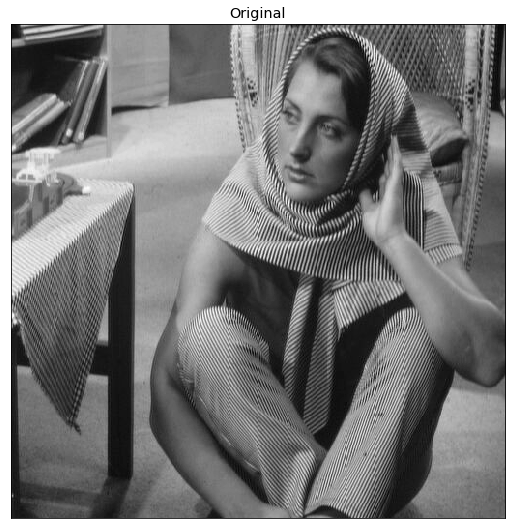

In [255]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from math import sqrt,exp

from nt_toolbox.general import *
from nt_toolbox.signal import *
from nt_toolbox.compute_wavelet_filter import *
plt.rcParams['figure.figsize'] = [30, 20]
plt.rcParams.update({'font.size': 12})
path='../data/images/barbara.jpg'

img = cv2.imread(path,0)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

In [256]:
def targetnoise(image,noise, SNR):
    # current noise SNR
    SNR_noise = 10*np.log10(np.var(image) /  np.var(noise))
    temp1 = np.log10(np.var(image))
    temp2 = SNR / 10
    sigma_d = 10 ** ((temp1-temp2)/2)
    d_noise = np.random.normal(0, sigma_d, image.shape)
    return d_noise

In [257]:
def get_sigma(img, SNR):
    temp1 = np.log10(np.var(img))
    temp2 = SNR / 10
    return 10 ** ((temp1-temp2)/2)

In [258]:
d_snr=[x*10 for x in range(-1,3)]
sigma = [get_sigma(img,x) for x in d_snr]


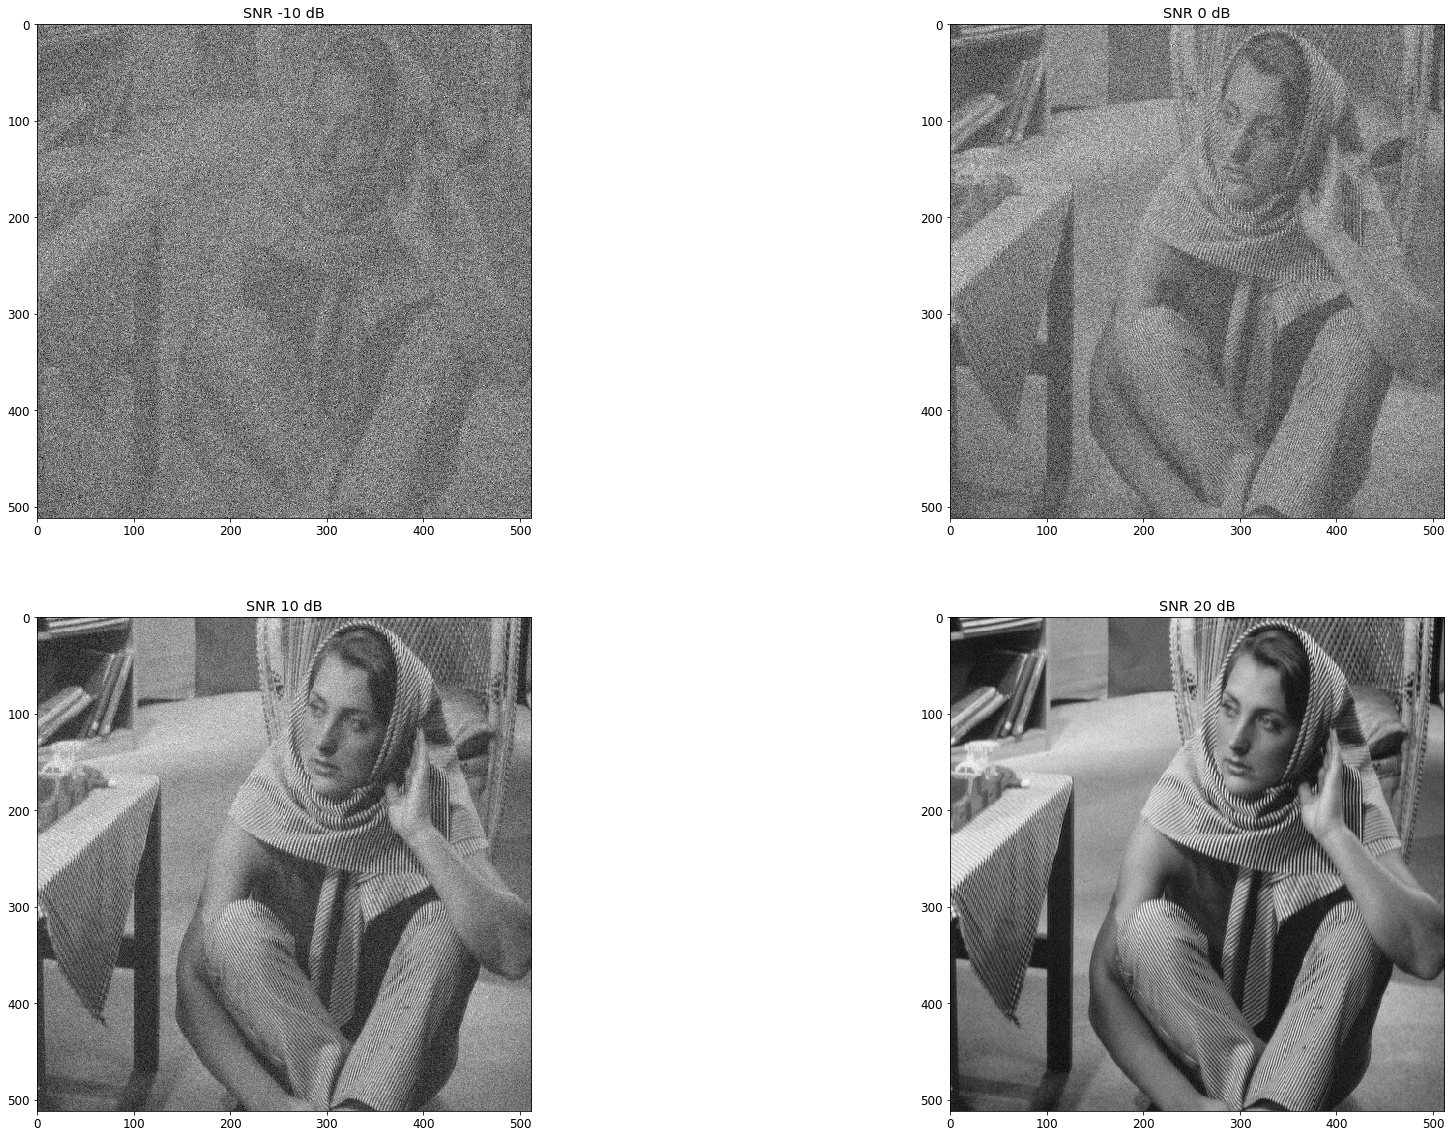

In [259]:
display = [img+targetnoise(img,np.random.normal(0, 1, img.shape),x)  for x in d_snr]

for i in range(len(display)):
    plt.subplot(2,2,i+1), plt.imshow(display[i], "gray"), plt.title("SNR "+ str(d_snr[i])+" dB")
plt.show()

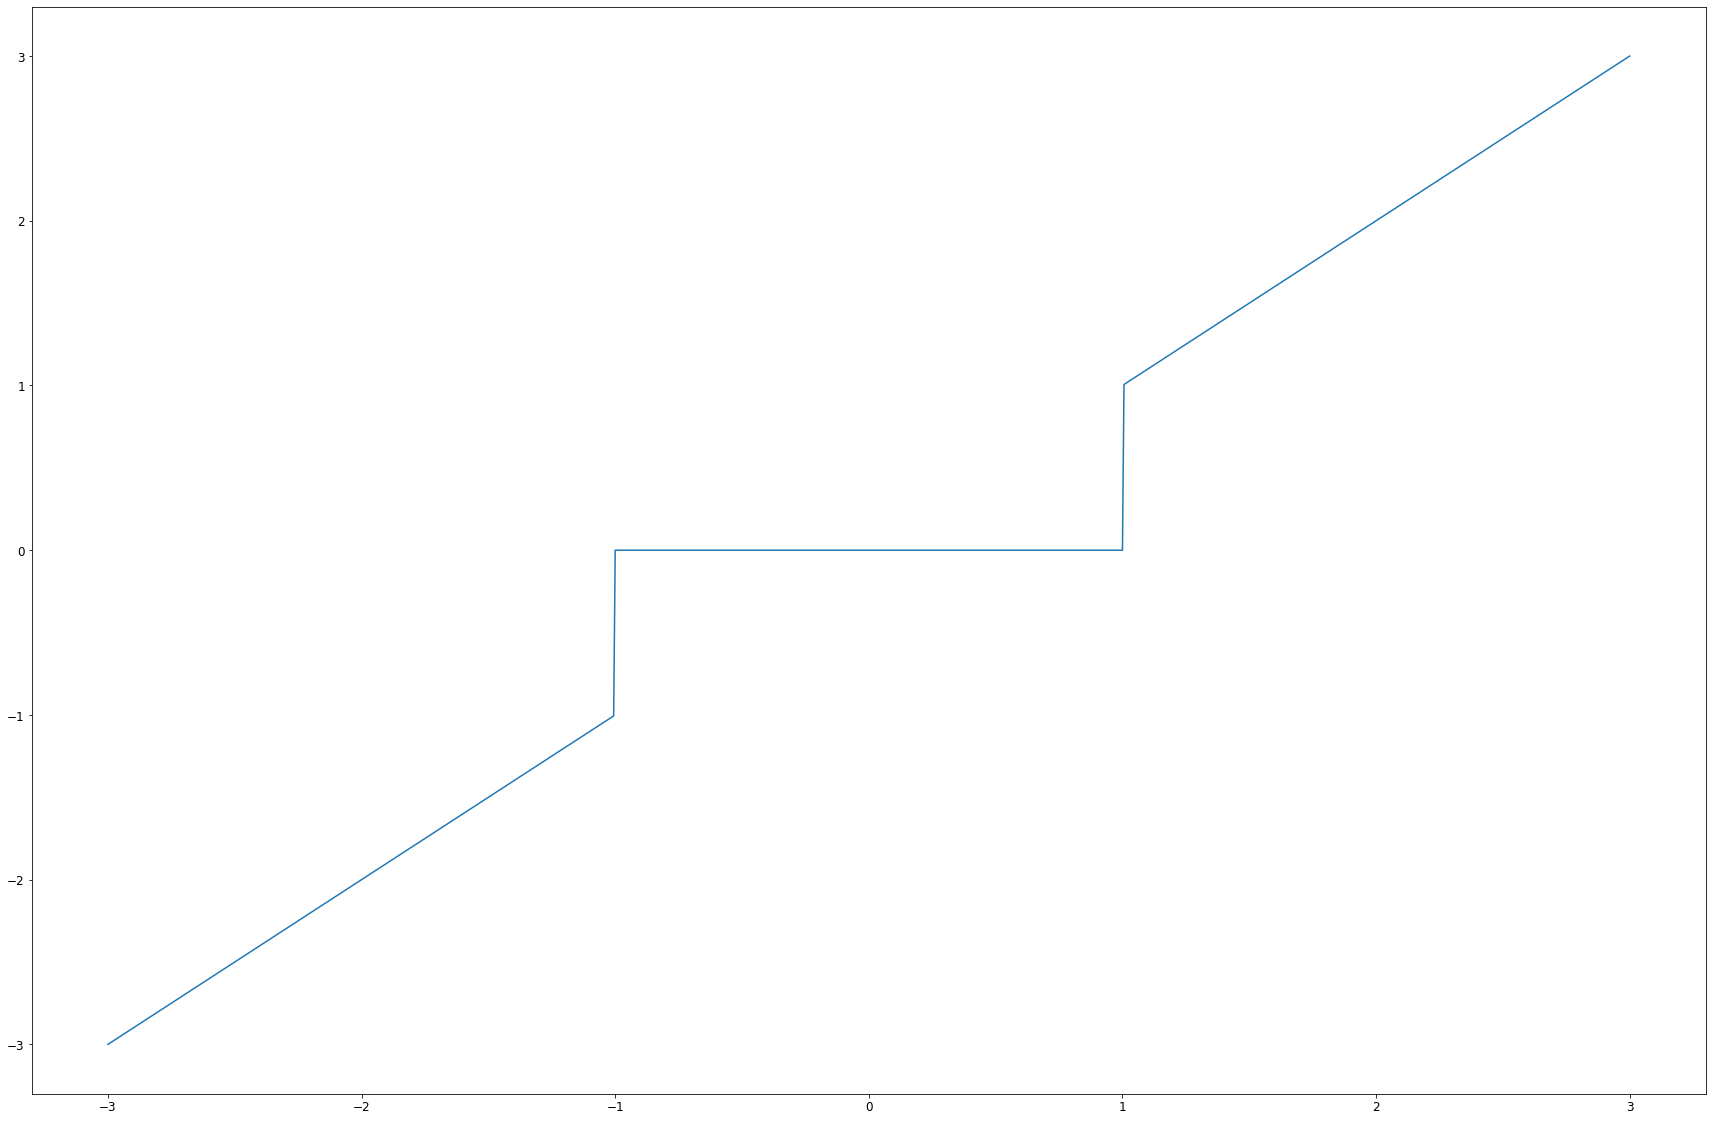

In [260]:
alpha =np.linspace(-3.0, 3.0, num=1000)

def thresh_hard(u,t):return u*(abs(u)>t)

plt.plot(alpha,thresh_hard(alpha,1))



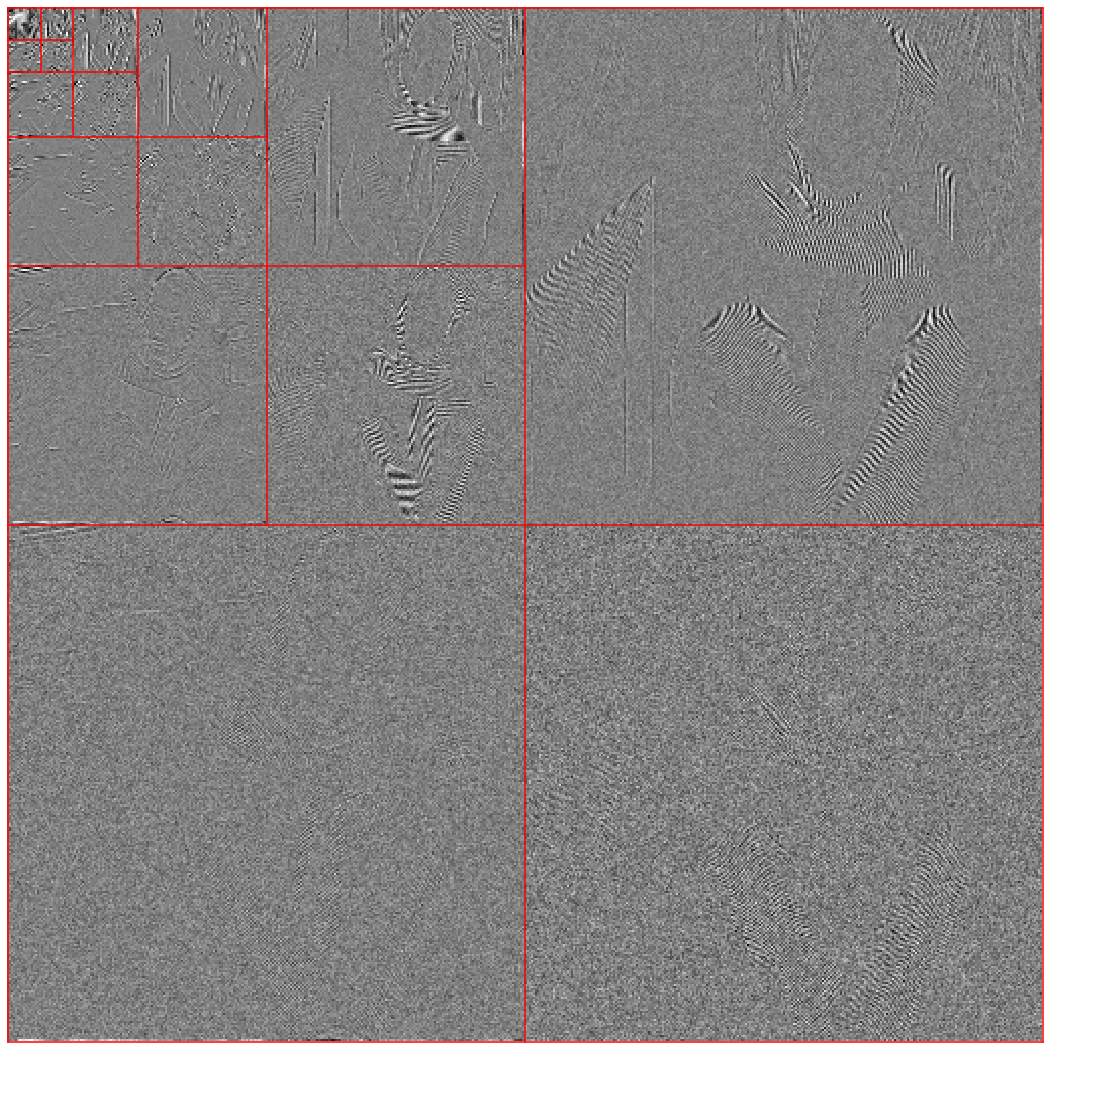

In [261]:
#Parameters for the orthogonal wavelet transformv
from numpy import linalg as LA
h = [0, .482962913145, .836516303738, .224143868042, -.129409522551]
h = h/LA.norm(h)
Jmin = 4
a = perform_wavortho_transf(display[2],Jmin,+1,h)
ah=plot_wavelet(a,Jmin)

array([[0.34219767, 0.29647064, 0.42356717, ..., 0.5       , 0.56406845,
        0.34248027],
       [0.29583597, 0.25297534, 0.15194729, ..., 0.5       , 0.58844754,
        0.34910002],
       [0.24780533, 0.        , 0.1172489 , ..., 0.55799655, 0.5       ,
        0.26211537],
       ...,
       [0.5       , 0.5       , 0.5       , ..., 0.5       , 0.5       ,
        0.5       ],
       [0.5       , 0.5       , 0.5       , ..., 0.34623329, 0.5       ,
        0.5       ],
       [0.5       , 0.42451853, 0.5       , ..., 0.5       , 0.66353535,
        0.5       ]])

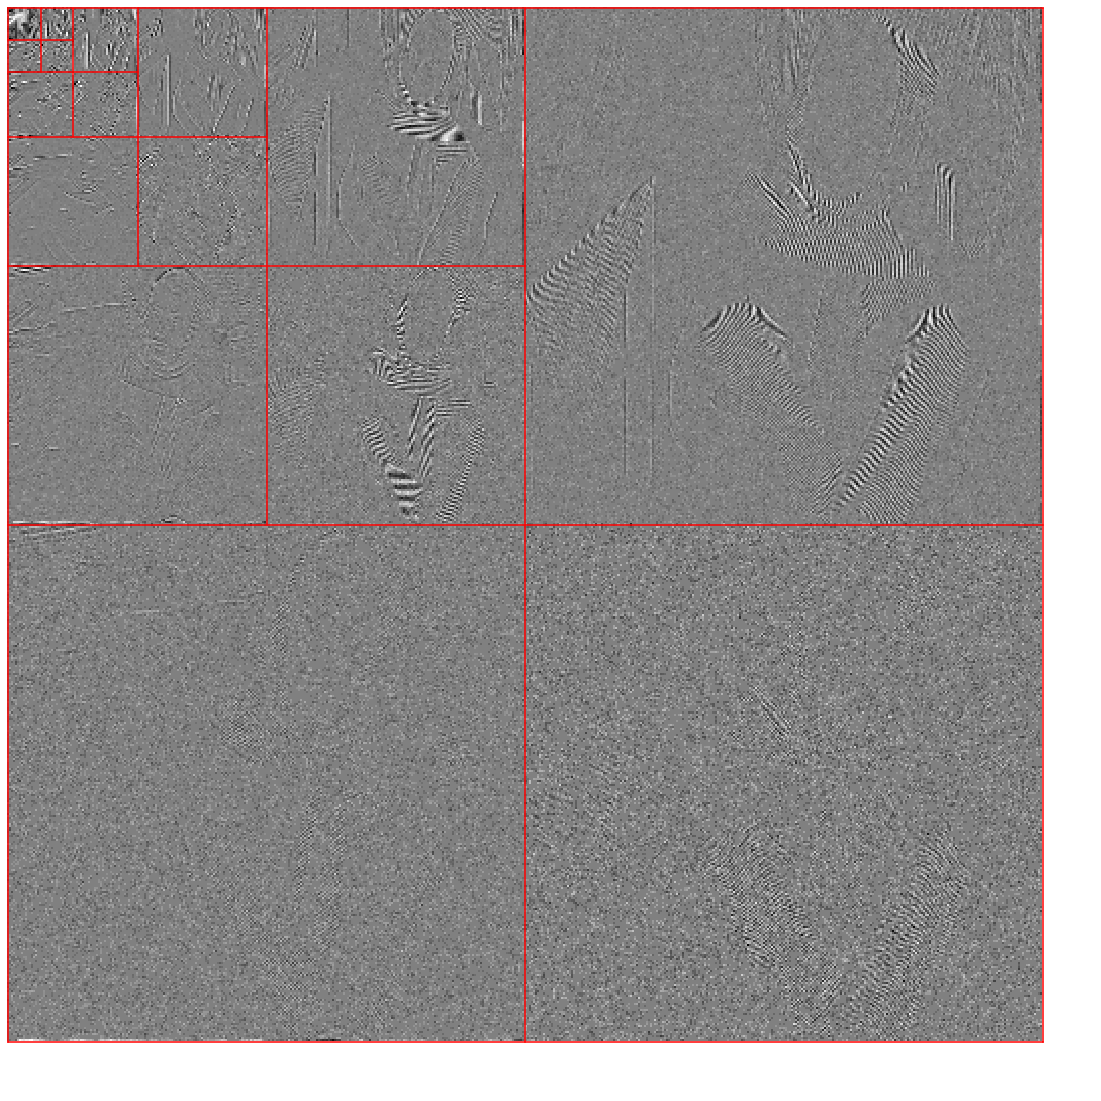

In [263]:
T = 3*sigma[3]

aT = thresh_hard(a,T)
plot_wavelet(aT,Jmin)